###TASK DESCRIPTION.

Build a CNN model to classify bird species. The training set consists of 47332 images of 325 different bird species. A validation set consisting of 1625 images (5 images for each bird specie) will be used to test the performance of the model and a final test set (1625 images) will be used to test the generalization performance of the model.

The data and the task comes from a Kaggle challenge:
https://www.kaggle.com/gpiosenka/100-bird-species/version/48?select=valid

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from os import getcwd
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import zipfile
import shutil
import matplotlib.image  as mpimg

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.getcwd()

'/content'

Creating the model

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2), 
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2), 
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(512, activation='relu'), 
  tf.keras.layers.Dense(325, activation='softmax')
])

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 32)      

Creating ImageDataGenerator for both the training and validation. Image augmentation is used for the train set

In [ ]:
TRAINING_DIR = f"{getcwd()}/gdrive/MyDrive/Bird_species/train"
train_datagen = ImageDataGenerator(rescale = 1/255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest' )
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    class_mode='categorical',
                                                    batch_size = 100,
                                                    target_size = (224, 224))

VALIDATION_DIR = f"{getcwd()}/gdrive/MyDrive/Bird_species/valid"
validation_datagen = ImageDataGenerator( rescale = 1/255 )
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                         batch_size=25,
                                                         class_mode  = 'categorical',
                                                         target_size = (224, 224))

TEST_DIR = f"{getcwd()}/gdrive/MyDrive/Bird_species/test"
test_datagen = ImageDataGenerator( rescale = 1/255 )
test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                         batch_size=25,
                                                         class_mode  = 'categorical',
                                                         target_size = (224, 224))

Found 47442 images belonging to 325 classes.
Found 1625 images belonging to 326 classes.
Found 1625 images belonging to 325 classes.


Fitting the model

In [ ]:
checkpoint_filepath = f"{getcwd()}/gdrive/MyDrive/Bird_species/model"

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
history = model.fit_generator(train_generator, epochs=15, validation_data= test_generator, callbacks=[model_checkpoint_callback])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/15
475/475 [==============================] - 987s 2s/step - loss: 5.0102 - acc: 0.0515 - val_loss: 3.7030 - val_acc: 0.1803
Epoch 2/15
475/475 [==============================] - 737s 2s/step - loss: 3.9437 - acc: 0.1661 - val_loss: 2.7643 - val_acc: 0.3588
Epoch 3/15
475/475 [==============================] - 725s 2s/step - loss: 3.4086 - acc: 0.2516 - val_loss: 2.3835 - val_acc: 0.4363
Epoch 4/15
475/475 [==============================] - 722s 2s/step - loss: 3.0421 - acc: 0.3163 - val_loss: 1.9676 - val_acc: 0.5218
Epoch 5/15
475/475 [==============================] - 708s 1s/step - loss: 2.7978 - acc: 0.3645 - val_loss: 1.7647 - val_acc: 0.5545
Epoch 6/15
475/475 [==============================] - 715s 2s/step - loss: 2.6025 - acc: 0.4004 - val_loss: 1.5528 - val_acc: 0.6197
Epoch 7/15
475/475 [==============================] - 716s 2s/step - loss: 2.4613 - acc: 0.4301 - val_loss: 1.5462 - val_acc: 0.6080
Epoch 8/15
475/475 [==============================] - 705s 1s/step - 

Plotting accuracy and loss results for both the training and validation set

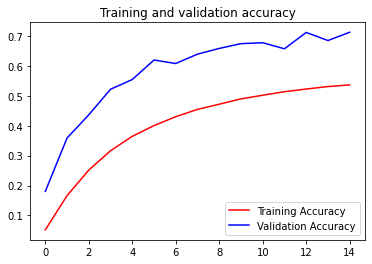

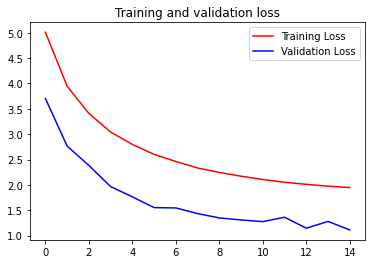

In [ ]:
%matplotlib inline


acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.title('Training and validation loss')
plt.legend()

plt.show()